In [37]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image

In [38]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    strike_rate: float
    bpb: float  # balls per boundary
    boundary_percent: float  # percentage of balls that are boundaries

In [39]:
def calculate_strike_rate(state: BatsmanState):

    strike_rate = (state['runs']/state['balls'])*100
    
    return {'strike_rate': strike_rate}

def calculate_bpb(state: BatsmanState):

    bpb = state['balls']/(state['fours'] + state['sixes'])

    return {'bpb': round(bpb, 2)}

def calculate_boundary_percent(state: BatsmanState):

    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    return {'boundary_percent': round(boundary_percent, 2)}

def summary(state: BatsmanState):

    summary = f"""
    Strike Rate - {state['strike_rate']} \n
    Balls per boundary - {state['bpb']} \n
    Boundary percent - {state['boundary_percent']}
    """
    
    return {'summary': summary}

In [40]:
# Initialize graph
graph = StateGraph(state_schema=BatsmanState)

# Define nodes
graph.add_node('calculate_strike_rate', calculate_strike_rate)
graph.add_node('calculate_bpb', calculate_bpb)  
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', summary)
# Define edges

graph.add_edge(START, 'calculate_strike_rate')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')
graph.add_edge('calculate_strike_rate', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percent', 'summary')
graph.add_edge('summary', END)

# Define workflow
workflow = graph.compile()

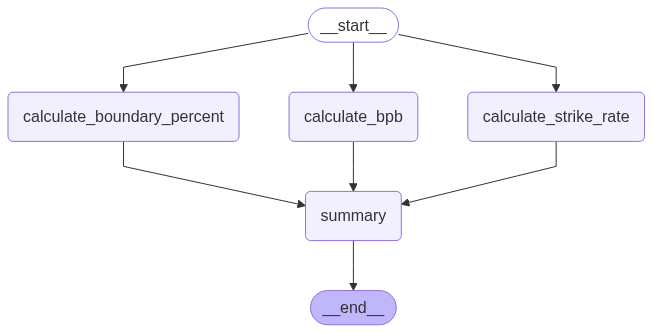

In [41]:
Image(workflow.get_graph().draw_mermaid_png()) 

In [42]:
initial_state = {"runs": 120, "balls": 80, "fours": 10, "sixes": 5}
final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 120, 'balls': 80, 'fours': 10, 'sixes': 5, 'strike_rate': 150.0, 'bpb': 5.33, 'boundary_percent': 58.33}
